In [4]:
# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import pickle
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [5]:
# ------------------------- 전처리 함수 정의 --------------------------------------------
# RGB 이미지에 대해 정규화 및 리사이즈 수행
def preprocess_image_rgb(img):
    img = img.resize((224, 224))  # 크기를 224x224로 통일
    img_array = np.array(img).astype(np.float32) / 255.0  # 픽셀 값 정규화 (0~1 사이)
    img_array = (img_array - 0.5) / 0.5  # 평균 0.5, 표준편차 0.5 기준으로 재정규화
    return img_array

In [6]:
# 흑백 전처리: Grayscale + 정규화
def preprocess_image_grayscale(img):
    img = img.resize((224, 224)).convert("L")  # 흑백 변환 ("L"은 PIL에서 grayscale 모드)
    img_array = np.array(img).astype(np.float32) / 255.0
    img_array = (img_array - 0.5) / 0.5
    img_array = np.expand_dims(img_array, axis=-1)  # 채널 차원 추가 → (224, 224, 1)
    return img_array

In [7]:
# ------------------------- 시각화 함수 정의 --------------------------------------------
# 이미지를 정규화 해제한 뒤 시각화
def show_image(img_array, cmap=None, title="Image"):
    restored = img_array * 0.5 + 0.5  # 정규화 해제 → 원래 값 복원
    plt.imshow(restored, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [8]:
# ------------------------- 전처리 전과 후 비교 함수 --------------------------------------------
def compare_preprocessing(data, idx):
    original = data['image'][idx]

    # 1. 원본 이미지 보기
    plt.imshow(original)
    plt.title("Before Preprocessing")
    plt.axis('off')
    plt.show()

    # 2. 기본 RGB 전처리 후 보기
    rgb_processed = preprocess_image_rgb(original)
    show_image(rgb_processed, title="After Basic Preprocessing (RGB)")

    # 3. 흑백 변환 후 보기
    gray_processed = preprocess_image_grayscale(original)
    show_image(gray_processed.squeeze(), cmap='gray', title="After Grayscale Preprocessing")

In [9]:
# ------------------------- pickle 데이터셋 로드 --------------------------------------------
# 저장된 GTSRB 교통 이미지 데이터셋을 불러옵니다.
# 데이터는 딕셔너리 형태로 되어 있고, 'image'와 'label' 키를 가지고 있다.
save_path = "../data/gtsrb_train_dataset_2000_balanced.pkl"
with open(save_path, "rb") as f:
    dataset = pickle.load(f)

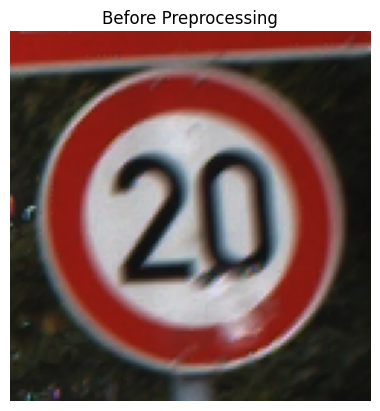

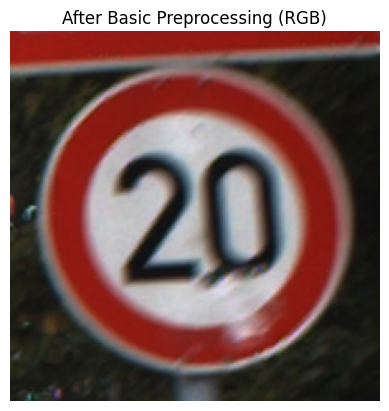

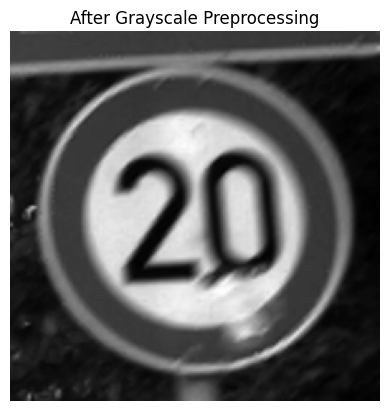

In [11]:
# ------------------------- 전처리 비교 실행 --------------------------------------------
# 첫번째 인덱스의 이미지에 대해 전처리 전과 후를 비교합니다
compare_preprocessing(dataset,0)